salesman実装サンプル

matplotlibの設定

In [ ]:
!pip install japanize-matplotlib
import japanize_matplotlib

# matplotlibの図をセルに表示するための設定
%matplotlib inline

     |████████████████████████████████| 4.1 MB 9.6 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=c5aa73a13b1db3ebefb6e186039eb1e62b2f9026205466a9d060e316807bce0c
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


①

In [ ]:
# pandasのインポート
import pandas as pd

# TSVの読み込み
df1 = pd.read_csv('salesman1.tsv', sep='\t', encoding='shift-jis')
df2 = pd.read_csv('salesman2.tsv', sep='\t', encoding='shift-jis')

# 正しく読み込めているかを確認するため、それぞれのデータフレームの内容を表示する
print('===salesman1.tsv===')
print(df1.head())
print('行列数',df1.shape)
print('===salesman2.tsv===')
print(df2.head())
print('行列数',df2.shape)

===salesman1.tsv===
   年齢 性別  勤続年数  担当顧客数       営業売上       年俸
0  20  F     0      5   700000.0  3130087
1  38  M     6      4   441600.0  3643832
2  26  F     0      6   909000.0  3162344
3  50  M    11      6   324000.0  4265395
4  50  F     7      7  1414000.0  4000936
行列数 (474, 6)
===salesman2.tsv===
   年齢 性別  勤続年数  担当顧客数      営業売上       年俸
0  37  F    12      5  330000.0  3991669
1  31  M     9      1  108900.0  3798249
2  23  M     2      5  408000.0  3229636
3  31  F     9      6  338400.0  3763893
4  37  F    10      7  921200.0  3805722
行列数 (478, 6)


In [ ]:
# データフレームを行方向に連結する
# この際、同じインデックス名がつくのを防ぐため、ignore_index=Trueとする
df = pd.concat([df1, df2], axis=0, ignore_index=True)

# 正しく連結できているかを確認するため、先頭、末尾の内容を表示する
print('===連結後のデータフレーム===')
print('==先頭==')
print(df.head())
print('==末尾==')
print(df.tail())
print('行列数',df.shape)

===連結後のデータフレーム===
==先頭==
   年齢 性別  勤続年数  担当顧客数       営業売上       年俸
0  20  F     0      5   700000.0  3130087
1  38  M     6      4   441600.0  3643832
2  26  F     0      6   909000.0  3162344
3  50  M    11      6   324000.0  4265395
4  50  F     7      7  1414000.0  4000936
==末尾==
     年齢 性別  勤続年数  担当顧客数       営業売上       年俸
947  36  M     1      6   276000.0  3257100
948  41  M     5      5  1040000.0  3895934
949  48  M    26      7  1118600.0  5090888
950  34  M     9      2   408000.0  4035536
951  39  M     1      1   186200.0  3271914
行列数 (952, 6)


②

In [ ]:
# 文字列データをダミー変数化する
# ダミー変数化の結果が変わらないよう、データ分割前にダミー変数化を実施する
# データフレームを丸ごと渡すことで、「性別」のみダミー変数化し、それ以外は元のままとしたデータフレームを取得できる
df_dummied = pd.get_dummies(df, drop_first=True)

# 正しくダミー変数化されていることを確認するため、内容を表示する
df_dummied.head()

,年齢,勤続年数,担当顧客数,営業売上,年俸,性別_M
0,20,0,5,700000.0,3130087,0
1,38,6,4,441600.0,3643832,1
2,26,0,6,909000.0,3162344,0
3,50,11,6,324000.0,4265395,1
4,50,7,7,1414000.0,4000936,0


③

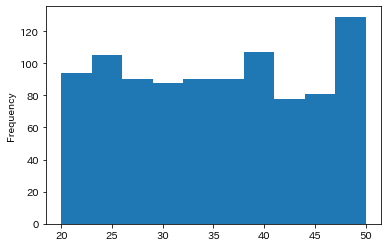

In [ ]:
# 「年齢」のヒストグラムを確認する
df_dummied['年齢'].plot(kind='hist')

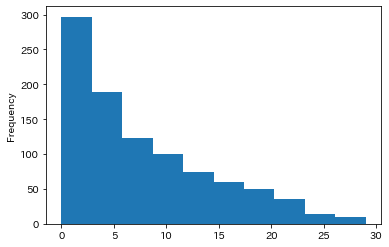

In [ ]:
# 「勤続年数」のヒストグラムを確認する
df_dummied['勤続年数'].plot(kind='hist')

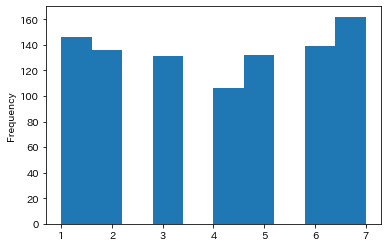

In [ ]:
# 「担当顧客数」のヒストグラムを確認する
df_dummied['担当顧客数'].plot(kind='hist')

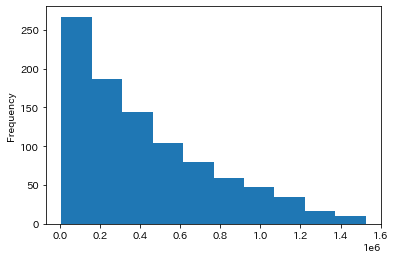

In [ ]:
# 「営業売上」のヒストグラムを確認する
df_dummied['営業売上'].plot(kind='hist')

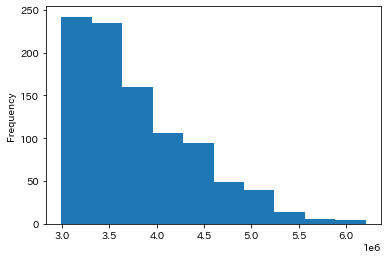

In [ ]:
# 「年俸」のヒストグラムを確認する
df_dummied['年俸'].plot(kind='hist')

④

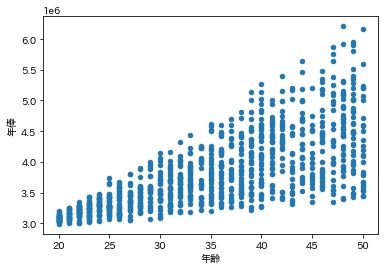

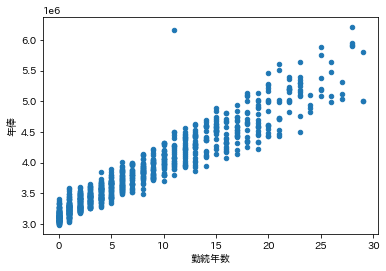

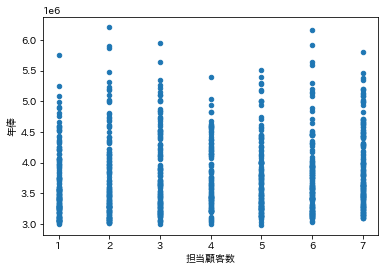

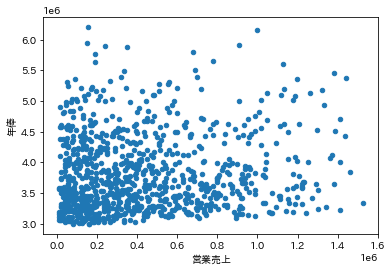

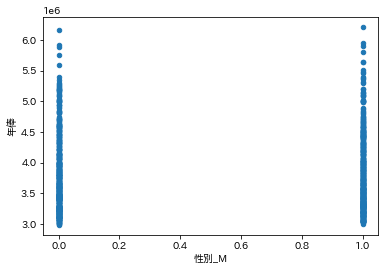

In [ ]:
# 外れ値を視覚的に確認するため、「年俸」とそれ以外の全ての列の組み合わせの散布図を表示する
# for文を使って散布図を描き、「年俸」同士の散布図は意味がないので描かない
for name in df_dummied.columns:
  if name == '年俸':
    continue
  df_dummied.plot(kind = 'scatter', x = name, y = '年俸')

In [ ]:
# 「年俸」と「勤続年数」の散布図より、外れ値があると判断した
# 該当箇所のデータを削除する前に、正しく外れ値を抽出できているか確認する
df_dummied[ (df['勤続年数'] < 20) & (df['年俸'] > 5500000)]

,年齢,勤続年数,担当顧客数,営業売上,年俸,性別_M
705,50,11,6,999600.0,6155947,0


In [ ]:
# 外れ値のindexを取得
outlier = df_dummied[ (df['勤続年数'] < 20) & (df['年俸'] > 5500000)].index[0]

# 外れ値を削除
df_dropped = df_dummied.drop(outlier)

# 外れ値削除後の行列数を表示し、1行減っていることを確認する
df_dropped.shape

(951, 6)

⑤

In [ ]:
# 各列に欠損値がどれだけ含まれているかを確認する
# 欠損値がある場合は穴埋めを考えるが、欠損値が多く分析で使えない列かもしれない
df_dropped.isnull().sum()

年齢       0
勤続年数     0
担当顧客数    0
営業売上     4
年俸       0
性別_M     0
dtype: int64

In [ ]:
# 951件中4件のため、今回は穴埋めにより対処する
# 一旦は平均値で穴埋めすることとし、モデルの性能が良くなければ別の対処も考えることにする
df_fillna = df_dropped.fillna(df_dropped.mean())

# 欠損値が補完されたことを確認する
df_fillna.isnull().any( axis=0 )

年齢       False
勤続年数     False
担当顧客数    False
営業売上     False
年俸       False
性別_M     False
dtype: bool

⑥

In [ ]:
# 「年俸」と関係のある項目を散布図から視覚的に見つけることもできるが、数値(相関係数)でも確認しておく
cor = df_fillna.corr()['年俸']

# 相関係数の絶対値の降順に表示する
cor.map(abs).sort_values(ascending = False)

年俸       1.000000
勤続年数     0.961142
年齢       0.728868
営業売上     0.099073
担当顧客数    0.080277
性別_M     0.013869
Name: 年俸, dtype: float64

In [ ]:
# 相関係数が四捨五入して0.10以上を特徴量に含めることとする
X = df_fillna[ ['勤続年数', '年齢', '営業売上'] ]
y = df_fillna['年俸']

⑦

In [ ]:
# 回帰（LinearRegression）モデルでk分割交差検証を実施する
# k分割交差検証(回帰モデル)をインポート
from sklearn.model_selection import KFold

# cross_validateインポート
from sklearn.model_selection import cross_validate

# LinearRegressionをインポート
from sklearn.linear_model import LinearRegression

# KFoldのオブジェクトを作成する
# 分割数は3とする
kf = KFold(n_splits = 3, shuffle = True, random_state = 0)

# 回帰モデルを生成する
model = LinearRegression()

# 交差検証を行い、結果をresultへ代入する
# 評価指標は'r2(決定係数)'とする
# 評価指標は'accuracy(正解率)'とする
# 訓練データでの結果も取得する
result = cross_validate(model, X, y, cv=kf, scoring='r2', return_train_score = True)

# 検証結果データ(辞書型)を表示する
print(result)

{'fit_time': array([0.0589292, 0.0041163, 0.0040493]), 'score_time': array([0.00388479, 0.0029006 , 0.00291967]), 'test_score': array([0.94104782, 0.93887529, 0.94413201]), 'train_score': array([0.94322177, 0.94377016, 0.94155679])}


In [ ]:
# 検証結果はデータフレームの方が見やすいので、データフレームで確認する
pd.DataFrame(result)

,fit_time,score_time,test_score,train_score
0,0.058929,0.003885,0.941048,0.943222
1,0.004116,0.002901,0.938875,0.943770
2,0.004049,0.002920,0.944132,0.941557


In [ ]:
# 検証データでの決定係数の平均を表示する
# test_scoreの合計 / 検証回数(分割数)
result['test_score'].sum() / 3

0.9413517068125676

⑧

In [ ]:
# k分割交差検証でモデルが有効なことがわかったので、訓練データでモデルを作成する
# 元のデータフレームを、訓練データとテストデータに分割して回帰(LineaRegression)モデルに学習させる

# train_test_splitをインポートする
from sklearn.model_selection import train_test_split

# X, y を訓練データ、テストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)

# 訓練データをモデルに学習させる
model.fit(X = X_train, y = y_train)

LinearRegression()

⑨

In [ ]:
# テストデータで予測した結果と、テストデータの正解データで、まずはMSEを求める
# mean_squared_errorのインポート
from sklearn.metrics import mean_squared_error

# mseを計算する
mse = mean_squared_error(model.predict(X_test), y_test)
print('mse:', mse)

mse: 22554401628.20374


In [ ]:
# mseから2乗平均平方根誤差(RMSE)を求める

# sqrtを使うため、mathをインポート
import math

# rmseを計算する
print('rmse:', math.sqrt(mse) )

rmse: 150181.22928050542


⑩

In [ ]:
# テストデータでの決定係数を表示する
print('score:', model.score(X_test, y_test))

score: 0.9414077581345132


⑪

In [ ]:
pd.Series( model.coef_, index=X_test.columns )

勤続年数   76665.23
年齢     10010.46
営業売上       0.15
dtype: float64

営業売上を1,000,000あげると年俸が約150,000上がる可能性がある  
勤続年数が1年増えると、年俸が約75,000上がる可能性がある

In [ ]:
# 指数表示したくないので、オプションを設定
pd.options.display.float_format = '{:.2f}'.format

df['営業売上'].describe()

count       948.00
mean     426181.65
std      342844.10
min        9000.00
25%      145575.00
50%      334650.00
75%      640500.00
max     1526000.00
Name: 営業売上, dtype: float64

社内のトップクラスでも営業売上が1,500,000なことを考えると、
年収を上げるには、営業成績よりも、勤続年数を伸ばす方が重要

In [ ]:
# 年収がどれくらいになるか、モデルを使って予測してみる
# 予測には'勤続年数','年齢','営業売上'の情報が必要
# まだ勤務していないので'営業売上'を仮決めする。
# 勤続年数0年の情報を確認する
df[ df['勤続年数'] == 0].describe()

,年齢,勤続年数,担当顧客数,営業売上,年俸
count,114.00,114.00,114.00,114.00,114.00
mean,24.83,0.00,3.85,386724.56,3133521.96
std,6.04,0.00,2.03,339113.54,85632.75
min,20.00,0.00,1.00,9000.00,2991687.00
25%,20.00,0.00,2.00,119000.00,3067077.00
50%,23.00,0.00,4.00,279900.00,3122625.50
75%,26.00,0.00,6.00,556500.00,3179932.00
max,48.00,0.00,7.00,1414000.00,3401855.00


In [ ]:
# 勤続年数0年の営業売上の平均は 386724.6 で、これを使って予測
predict_data = pd.DataFrame(
    columns=['勤続年数','年齢','営業売上'],
    data=[[0, 35, 386724.6]]
)
model.predict(predict_data)

array([3228920.80671604])

初年度の年収は大体3,228,920あたりと考えられる

In [ ]:
# 営業売上社内最大の1526000だとして、4年目の年収は…
predict_data = pd.DataFrame(
    columns=['勤続年数','年齢','営業売上'],
    data=[[4, 38, 1526000]]
)

model.predict(predict_data)

array([3741539.2160151])

3年で希望の年収には厳しそう

In [ ]:
for n in range(10):
  predicted = model.predict( [[ n, 35+n, 1526000]] )
  print('{}年目 {:.0f}'.format(n+1, predicted[0]))

1年目 3404847
2年目 3491523
3年目 3578198
4年目 3664874
5年目 3751550
6年目 3838225
7年目 3924901
8年目 4011577
9年目 4098252
10年目 4184928


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not h

トップセールスマンでも8年目でなければ年収400以上は難しそう